## Importing Required Libraries Section

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
%matplotlib inline

### Reading Data from Source

In [32]:
path1 = r'D:\Machine_Learning\Datasets\01_Combined Cycle Power Plant.xlsx'
path2 = r'C:\03_Machine Learning\Datasets\01_Combined Cycle Power Plant.xlsx'

In [33]:
try:
    df = pd.read_excel(path1)
    print("File loaded from path1")
except FileNotFoundError:
    try:
        df = pd.read_excel(path2)
        print("File loaded from path2")
    except FileNotFoundError:
        raise FileNotFoundError("File not found in both path1 and path2")

File loaded from path1


AT (Ambient Temperature) – The temperature outside in degrees Celsius.

V (Exhaust Vacuum) – The vacuum (pressure) in cm Hg.

AP (Ambient Pressure) – The atmospheric pressure in millibar.

RH (Relative Humidity) – The relative humidity in percentage (%).

PE (Power Output / Energy Output) – The net hourly electrical energy output of the plant in megawatts (MW).

In [34]:
# df = pd.read_excel(path)
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [35]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


In [36]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [37]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


## Visualization

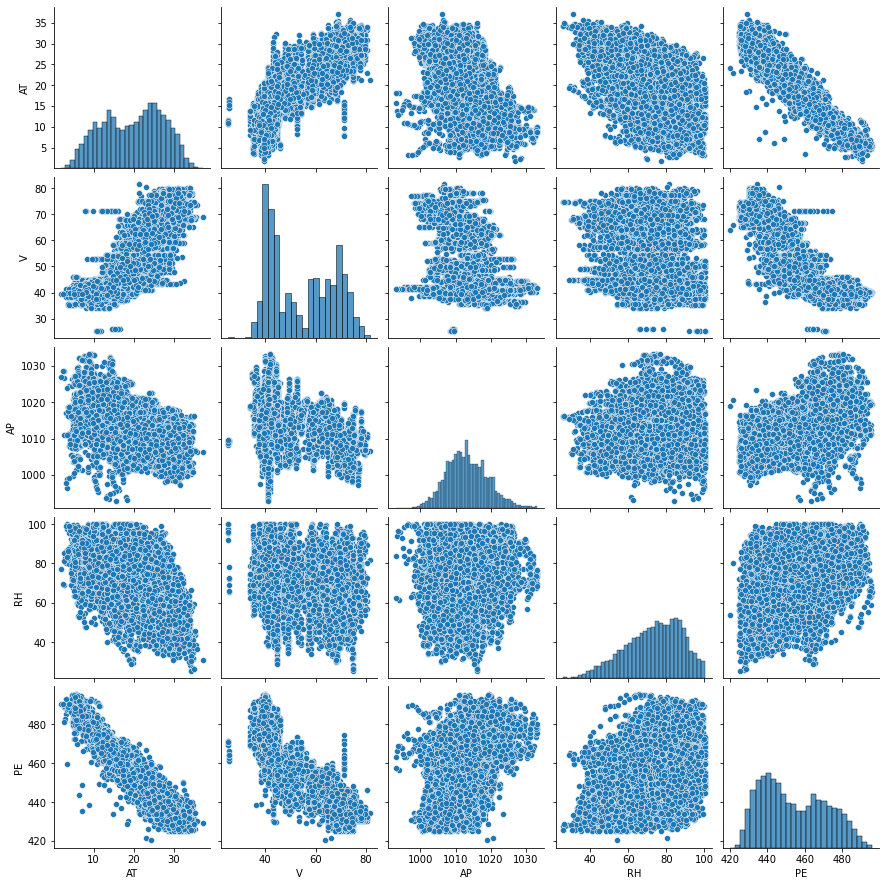

In [39]:
sns.pairplot(df)
plt.show()

## Visualize Data point moreclosely 

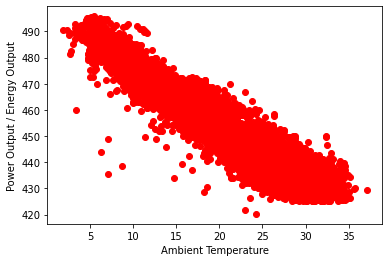

In [40]:
plt.scatter(df['AT'],df['PE'],color='r')
plt.xlabel("Ambient Temperature")
plt.ylabel("Power Output / Energy Output")
plt.show()

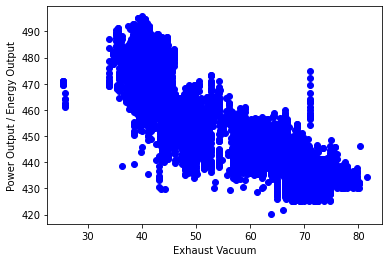

In [41]:
plt.scatter(df['V'],df['PE'],color='b')
plt.xlabel("Exhaust Vacuum")
plt.ylabel("Power Output / Energy Output")
plt.show()

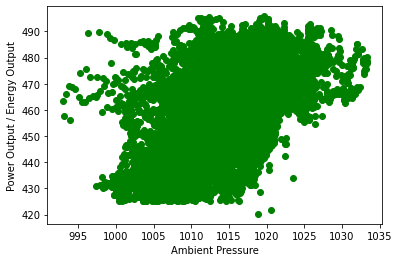

In [42]:
plt.scatter(df['AP'],df['PE'],color='g')
plt.xlabel("Ambient Pressure")
plt.ylabel("Power Output / Energy Output")
plt.show()

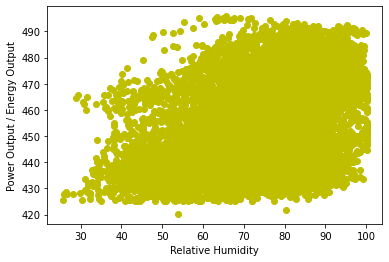

In [43]:
plt.scatter(df['RH'],df['PE'],color='y')
plt.xlabel("Relative Humidity")
plt.ylabel("Power Output / Energy Output")
plt.show()

## Seperating Feature for Dependent and Independent Features

In [44]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [45]:
X.head()


,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [46]:
y.head()

0    463.26
1    444.37
2    488.56
3    446.48
4    473.90
Name: PE, dtype: float64

## Train Test Split

In [47]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.25, random_state=42)

In [48]:
X_train

,AT,V,AP,RH
2058,8.05,38.38,1021.14,86.39
8042,6.16,38.50,1012.83,93.68
7612,24.56,63.21,1013.79,82.38
1166,12.55,38.91,1012.58,75.44
3597,29.24,64.33,1011.49,65.08
...,...,...,...,...
5734,23.39,61.87,1010.35,48.91
5191,11.63,40.55,1022.89,87.12
5390,27.79,69.23,1012.86,45.71
860,12.26,41.50,1014.87,89.41


In [49]:
y_train

2058    482.17
8042    490.92
7612    444.34
1166    474.35
3597    440.12
         ...  
5734    444.03
5191    474.67
5390    435.06
860     471.13
7270    472.43
Name: PE, Length: 7176, dtype: float64

In [50]:
X_test

,AT,V,AP,RH
2513,19.64,48.06,1014.81,74.96
9411,28.26,69.23,1013.01,42.10
8745,27.98,67.17,1007.32,75.29
9085,28.64,69.23,1013.11,37.13
4950,9.34,38.08,1019.56,67.74
...,...,...,...,...
4427,7.98,39.61,1018.57,77.04
3297,27.82,76.09,1007.83,76.07
1244,16.77,49.39,1018.61,95.86
3614,12.25,44.58,1016.47,81.15


In [51]:
y_test

2513    455.27
9411    436.31
8745    440.68
9085    434.40
4950    482.06
         ...  
4427    479.78
3297    434.52
1244    459.38
3614    475.24
5651    450.64
Name: PE, Length: 2392, dtype: float64

In [52]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


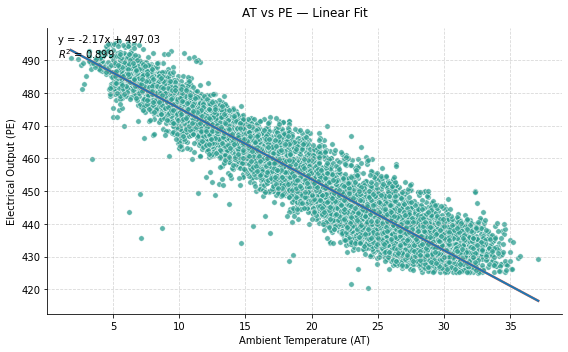

In [53]:
# Data
x = df['AT'].to_numpy()
y = df['PE'].to_numpy()

# Linear fit
m, b = np.polyfit(x, y, 1)
y_hat = m * x + b

# R²
ss_res = np.sum((y - y_hat) ** 2)
ss_tot = np.sum((y - y.mean()) ** 2)
r2 = 1 - ss_res / ss_tot

# Sort for a neat line
order = np.argsort(x)
x_line = x[order]
y_line = y_hat[order]

# Plot (single chart)
plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=30, alpha=0.75,
            color=scatter_color, edgecolors='white', linewidths=0.6, label='Data')
plt.plot(x_line, y_line, linewidth=2.5, color=line_color, label='Linear fit')       # subtle transparency
plt.plot(x_line, y_line, linewidth=2)       # crisp fit line

plt.title('AT vs PE — Linear Fit', pad=12)
plt.xlabel('Ambient Temperature (AT)')
plt.ylabel('Electrical Output (PE)')

# Subtle styling without setting colors/styles explicitly
ax = plt.gca()
ax.grid(True, linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=10)

# Equation + R² annotation
plt.text(0.02, 0.98, f'y = {m:.2f}x + {b:.2f}\n$R^2$ = {r2:.3f}',
         transform=ax.transAxes, va='top')

plt.tight_layout()
plt.show()


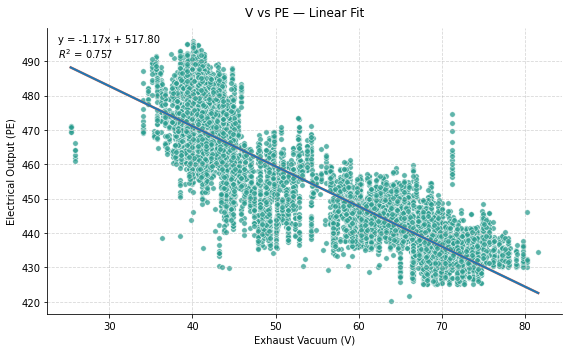

In [54]:
# Data
x = df['V'].to_numpy()
y = df['PE'].to_numpy()

# Linear fit
m, b = np.polyfit(x, y, 1)
y_hat = m * x + b

# R²
ss_res = np.sum((y - y_hat) ** 2)
ss_tot = np.sum((y - y.mean()) ** 2)
r2 = 1 - ss_res / ss_tot

# Sort for a neat line
order = np.argsort(x)
x_line = x[order]
y_line = y_hat[order]

# Plot (single chart)
plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=30, alpha=0.75,
            color=scatter_color, edgecolors='white', linewidths=0.6, label='Data')
plt.plot(x_line, y_line, linewidth=2.5, color=line_color, label='Linear fit')       # subtle transparency
plt.plot(x_line, y_line, linewidth=2)       # crisp fit line

plt.title('V vs PE — Linear Fit', pad=12)
plt.xlabel('Exhaust Vacuum (V)')
plt.ylabel('Electrical Output (PE)')

# Subtle styling without setting colors/styles explicitly
ax = plt.gca()
ax.grid(True, linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=10)

# Equation + R² annotation
plt.text(0.02, 0.98, f'y = {m:.2f}x + {b:.2f}\n$R^2$ = {r2:.3f}',
         transform=ax.transAxes, va='top')

plt.tight_layout()
plt.show()


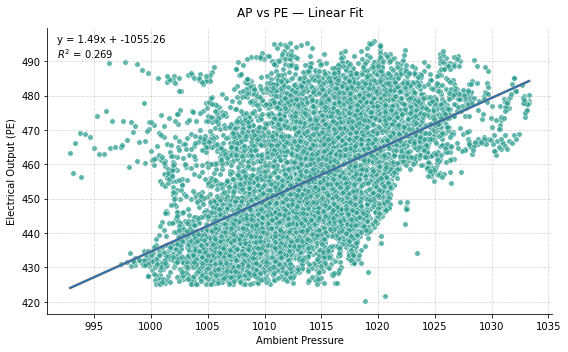

In [55]:
# Data
x = df['AP'].to_numpy()
y = df['PE'].to_numpy()

# Linear fit
m, b = np.polyfit(x, y, 1)
y_hat = m * x + b

# R²
ss_res = np.sum((y - y_hat) ** 2)
ss_tot = np.sum((y - y.mean()) ** 2)
r2 = 1 - ss_res / ss_tot

# Sort for a neat line
order = np.argsort(x)
x_line = x[order]
y_line = y_hat[order]

# Plot (single chart)
plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=30, alpha=0.75,
            color=scatter_color, edgecolors='white', linewidths=0.6, label='Data')
plt.plot(x_line, y_line, linewidth=2.5, color=line_color, label='Linear fit')       # subtle transparency
plt.plot(x_line, y_line, linewidth=2)       # crisp fit line

plt.title('AP vs PE — Linear Fit', pad=12)
plt.xlabel('Ambient Pressure')
plt.ylabel('Electrical Output (PE)')

# Subtle styling without setting colors/styles explicitly
ax = plt.gca()
ax.grid(True, linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=10)

# Equation + R² annotation
plt.text(0.02, 0.98, f'y = {m:.2f}x + {b:.2f}\n$R^2$ = {r2:.3f}',
         transform=ax.transAxes, va='top')

plt.tight_layout()
plt.show()


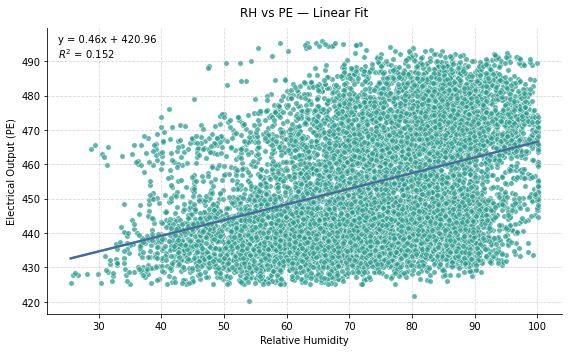

In [56]:
# Data
x = df['RH'].to_numpy()
y = df['PE'].to_numpy()

# Linear fit
m, b = np.polyfit(x, y, 1)
y_hat = m * x + b

# R²
ss_res = np.sum((y - y_hat) ** 2)
ss_tot = np.sum((y - y.mean()) ** 2)
r2 = 1 - ss_res / ss_tot

# Sort for a neat line
order = np.argsort(x)
x_line = x[order]
y_line = y_hat[order]

# Plot (single chart)
plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=30, alpha=0.75,
            color=scatter_color, edgecolors='white', linewidths=0.6, label='Data')
plt.plot(x_line, y_line, linewidth=2.5, color=line_color, label='Linear fit')       # subtle transparency
plt.plot(x_line, y_line, linewidth=2)       # crisp fit line

plt.title('RH vs PE — Linear Fit', pad=12)
plt.xlabel('Relative Humidity')
plt.ylabel('Electrical Output (PE)')

# Subtle styling without setting colors/styles explicitly
ax = plt.gca()
ax.grid(True, linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=10)

# Equation + R² annotation
plt.text(0.02, 0.98, f'y = {m:.2f}x + {b:.2f}\n$R^2$ = {r2:.3f}',
         transform=ax.transAxes, va='top')

plt.tight_layout()
plt.show()

## Scaling the Training Data Set

In [62]:
scalar = StandardScaler()

In [63]:
X_train = scalar.fit_transform(X_train)

In [64]:
X_test = scalar.transform(X_test)

## Training the model

In [65]:
regression = LinearRegression()

In [66]:
regression.fit(X_train,y_train)

LinearRegression()

## Cross Validation

In [68]:
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv = 3)
validation_score

array([-22.11499209, -19.82686925, -20.6347633 ])

In [70]:
np.mean(validation_score)

-20.858874881291054

## Prediction

In [71]:
y_pred = regression.predict(X_test)
y_pred

array([455.65553122, 438.71597518, 434.15346986, ..., 457.97996889,
       470.31482905, 449.77993198])

## Performance Matrix

In [73]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

20.581925958913818
3.5858052750059493
4.536730756713894


## R Square
Formula

**R^2 = 1-SSR/SST**

R^2 = Coefficient of determination

SSR = sum of squares of residuals

SST = Total sum of Square


In [76]:
score = r2_score(y_test,y_pred)
print(score)

0.9291941662017059


## Adjusted R Square

In [77]:
## Display Adjusted R-Sqared
1 - (1-score)*(len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)

0.9290755137780808

## Assumption

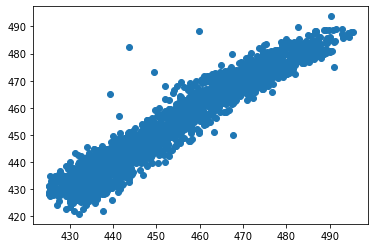

In [78]:
plt.scatter(y_test,y_pred)

In [79]:
residuals = y_test-y_pred
print(residuals)

2513   -0.385531
9411   -2.405975
8745    6.526530
9085   -4.351994
4950    2.143882
          ...   
4427   -0.967732
3297    2.183875
1244    1.400031
3614    4.925171
5651    0.860068
Name: PE, Length: 2392, dtype: float64


## Plot this residuals

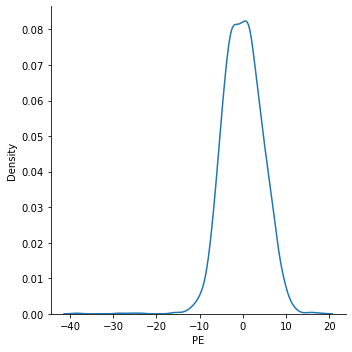

In [80]:
sns.displot(residuals,kind='kde')

## Scatter plot with predictions and residuals

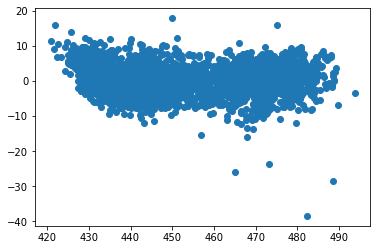

In [81]:
plt.scatter(y_pred,residuals)

## OLS Linear Regression

In [84]:
# import statsmodels.api as sm

In [ ]:
# model = sm.OLS(y_train, X_train).fit()

In [ ]:
# prediction = model.predict(X_test)
# print(prediction)